In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/small-nice-data-dota2/small_nice_data.csv",
                 index_col=0)

df.head()

,time,radiant_roshankill,radiant_Δroshankill,dire_roshankill,dire_Δroshankill,good_tower1,good_tower2,good_tower3,good_melee,good_range,...,radiant_buyback,dire_buyback,radiant_Δrunes,dire_Δrunes,radiant_runes,dire_runes,radiant_aegis,dire_aegis,radiantΔaegis,direΔaegis
0,0,0,0,0,0,3,3,3,3,3,...,0,0,1,1,1,1,0,0,0,0
1,60,0,0,0,0,3,3,3,3,3,...,0,0,1,1,2,2,0,0,0,0
2,120,0,0,0,0,3,3,3,3,3,...,0,0,0,0,2,2,0,0,0,0
3,180,0,0,0,0,3,3,3,3,3,...,0,0,0,0,2,2,0,0,0,0
4,240,0,0,0,0,3,3,3,3,3,...,0,0,0,0,2,2,0,0,0,0


In [3]:
df.shape

(164300, 83)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164300 entries, 0 to 164742
Data columns (total 83 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       164300 non-null  int64  
 1   radiant_roshankill         164300 non-null  int64  
 2   radiant_Δroshankill        164300 non-null  int64  
 3   dire_roshankill            164300 non-null  int64  
 4   dire_Δroshankill           164300 non-null  int64  
 5   good_tower1                164300 non-null  int64  
 6   good_tower2                164300 non-null  int64  
 7   good_tower3                164300 non-null  int64  
 8   good_melee                 164300 non-null  int64  
 9   good_range                 164300 non-null  int64  
 10  good_fort                  164300 non-null  int64  
 11  bad_tower1                 164300 non-null  int64  
 12  bad_tower2                 164300 non-null  int64  
 13  bad_tower3                 164300 

In [5]:
df.describe()

,time,radiant_roshankill,radiant_Δroshankill,dire_roshankill,dire_Δroshankill,good_tower1,good_tower2,good_tower3,good_melee,good_range,...,radiant_buyback,dire_buyback,radiant_Δrunes,dire_Δrunes,radiant_runes,dire_runes,radiant_aegis,dire_aegis,radiantΔaegis,direΔaegis
count,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,...,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000
mean,1072.197079,0.285813,0.022069,0.197663,0.016932,1.661540,2.553670,2.872051,2.906032,2.916226,...,0.438497,0.423177,0.606409,0.596884,11.661236,11.479075,0.274583,0.187182,0.021272,0.016196
std,734.369752,0.607209,0.146910,0.491219,0.129019,1.229113,0.879006,0.467094,0.397592,0.376865,...,1.134580,1.116944,0.904239,0.900847,8.688824,8.478081,0.589938,0.476634,0.144290,0.126229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1020.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,1560.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,1.000000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000
max,5820.000000,6.000000,1.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,21.000000,19.000000,6.000000,7.000000,134.000000,106.000000,5.000000,5.000000,1.000000,1.000000


In [6]:
df['time'].median()

1020.0

In [7]:
df = df.drop(columns='id')

In [8]:
y = df['time']
X = df.drop(columns='time')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [10]:

num_columns = X.select_dtypes(include="number").columns


num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['radiant_roshankill', 'radiant_Δroshankill', 'dire_roshankill',
       'dire_Δroshankill', 'good_tower1', 'good_tower2', 'good_tower3',
       'good_melee', 'good_range', 'good_fort', 'bad_tower1', 'bad_tower2',
       'bad_tower3', 'bad_melee', 'bad_range', 'bad_fort', 'y', 'ra...
       'radiant_secret_shop_cost', 'dire_secret_shop_cost',
       'radiant_null_cost', 'dire_null_cost', 'radiant_Δkills', 'dire_Δkills',
       'radiant_kills', 'dire_kills', 'radiant_Δbuyback', 'dire_Δbuyback',
       'radiant_buyback', 'dire_buyback', 'radiant_Δrunes', 'dire_Δrunes',
       'radiant_runes', 'dire_runes', 'radiant_aegis', 'dire_aegis',
       'radiantΔaegis', 'direΔaegis'],
      dtype='object'))])

In [11]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [12]:
model = lgb.LGBMRegressor(objective='mse', n_estimators=200, max_depth=4, learning_rate=0.01)
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_names = ['test', 'train'],
          eval_metric='mae')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8102
[LightGBM] [Info] Number of data points in the train set: 131440, number of used features: 81
[LightGBM] [Info] Start training from score 1072.303256


LGBMRegressor(learning_rate=0.01, max_depth=4, n_estimators=200,
              objective='mse')

In [13]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

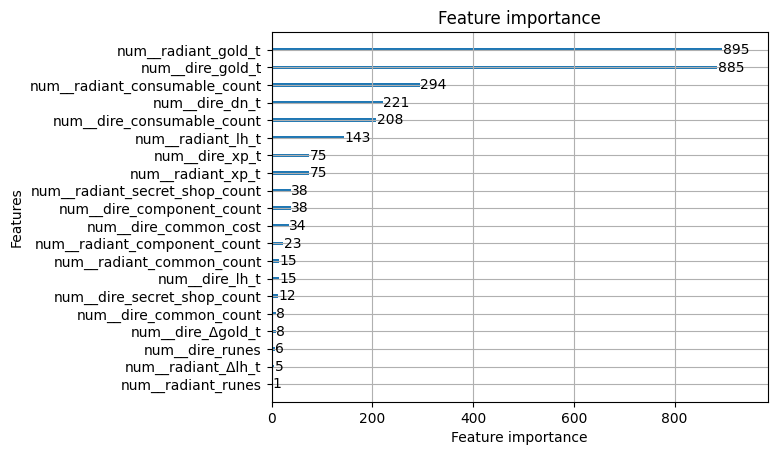

In [14]:
lgb.plot_importance(model, max_num_features=20)

In [15]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,92.01,91.33
RMSE,119.24,118.58
R2,0.97,0.97


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

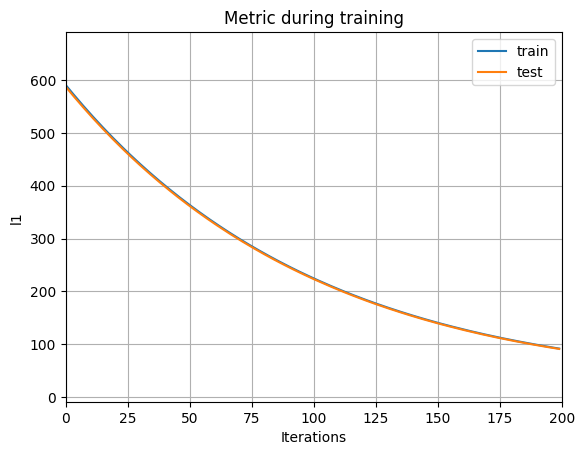

In [16]:
lgb.plot_metric(model,
                metric='l1')